<a href="https://colab.research.google.com/github/avii-001/Data_Science/blob/main/Predict_House_Price_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### California housing



In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Process
# Identification
# Business Understanding
# Collecting Data
# Pre-Procession Data
# Analyzing data
# Data Modeling
# Data Evaluation
# Model Training
# Model Depl;

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/drive/MyDrive/kusumm/Data Science/data/housing.csv')

In [6]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [9]:
df['ocean_proxi_catg'] = df['ocean_proximity'].apply(lambda x: 5 if x == '<1H OCEAN' else (4 if x == 'NEAR OCEAN' else (3 if x == 'NEAR BAY' else (2 if x == 'INLAND' else 1))))

In [10]:
df.drop(['ocean_proximity'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proxi_catg    20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [12]:
df.isnull().sum(), df.shape

(longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        207
 population              0
 households              0
 median_income           0
 median_house_value      0
 ocean_proxi_catg        0
 dtype: int64,
 (20640, 10))

In [13]:
df.dropna(inplace=True)
df.shape

(20433, 10)

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proxi_catg
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,3.694465
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.316748
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,4.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,5.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


Text(0.5, 1.0, 'Correlation Matrix')

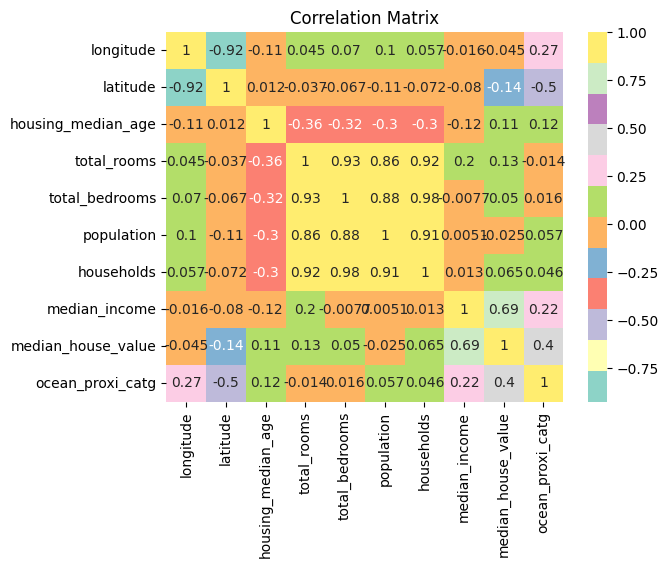

In [33]:
corelation =df.corr()
ax=sns.heatmap(corelation,cmap='Set3',annot=True)
ax.set_title('Correlation Matrix')

In [16]:
df.skew()


,0
longitude,-0.296141
latitude,0.464934
housing_median_age,0.061605
total_rooms,4.158816
total_bedrooms,3.459546
population,4.960017
households,3.413850
median_income,1.644557
median_house_value,0.978290
ocean_proxi_catg,-0.263388


In [17]:
# Determining feature & target datasets
# X=df[['housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income'	]]
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [18]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

**Adding constant to get intercept <br>
if constant is not added, y=0 when x=0. (which is not true(invalid assumption in real-wolrd datasets)).**

In [19]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)

# Fitting regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()


#### **OLS (Ordinary Least Squares) objective:**
**To find the best-fitting line by minimizing the sum of squared residuals.**<br>(differences between observed and predicted values) (Optimal Line)
####**How OLS Works**:
1. Model Prediction:
  * For every x, the model predicts y_pred=c+mx
2. Residual Calculation:
  * Residual (Error that model makes) = Actual Value(y) - Predicted Value
3. Sum of Squared Residuals
  * To avoid cancellation of +ve & -ve erros, residuals are squared.
  * SSR=sum(y-y_pred)^2
4. Minimization:
  * OLS finds the values of c & m that minimizes SSR

In [20]:
lr.params

,0
const,-2.972588e+06
longitude,-3.431886e+04
latitude,-3.236162e+04
housing_median_age,1.115522e+03
total_rooms,-5.915615e+00
total_bedrooms,1.054394e+02
population,-4.486060e+01
households,6.047924e+01
median_income,3.914752e+04
ocean_proxi_catg,1.021117e+04


In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3324.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        04:56:26   Log-Likelihood:            -2.0518e+05
No. Observations:               16346   AIC:                         4.104e+05
Df Residuals:                   16336   BIC:                         4.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.973e+06   7.66

* R-squared: A measure of how well the model fits the data.
* Coefficients: Values for the intercept and slopes for each independent variable.
* Standard errors: Measure of the uncertainty in the estimated coefficients.
* p-values: Used to assess the statistical significance of each coefficient.

In [22]:
X_train.shape,  y_train.shape

((16346, 9), (16346,))

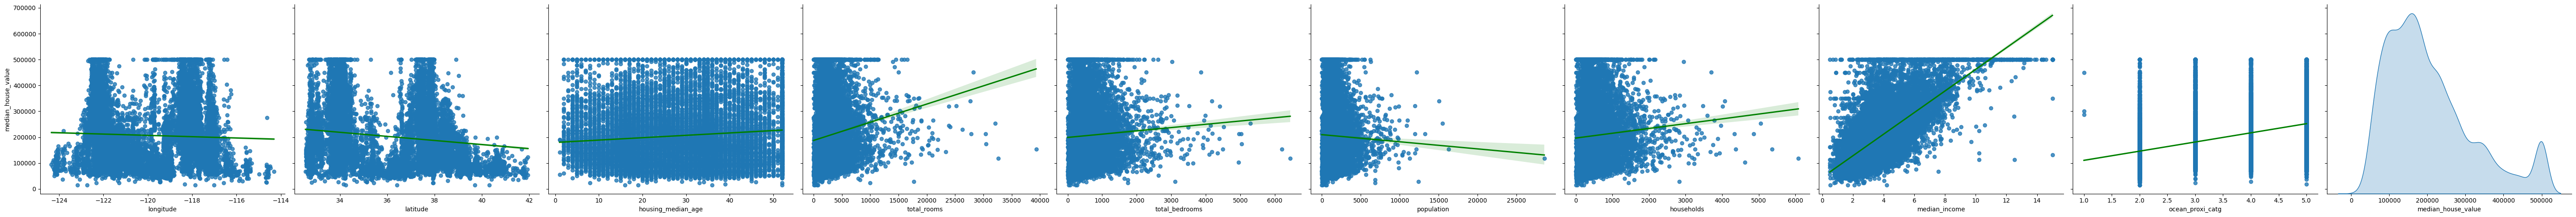

In [23]:
import seaborn as sns
sns.pairplot(pd.concat([X_train, y_train], axis=1),                       # Needed to concatenate since there are multiple feature data
             y_vars=['median_house_value'],                               # column used in vertical axis (y-axis)-Focus on the target variable
             palette='Set2',
             height=5, aspect=1.2,
             kind='reg',diag_kind='kde',
             plot_kws={'line_kws':{'color':'green'}})                     # passing dictionary of line_kws to change color of line to green
plt.show()

In [24]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)

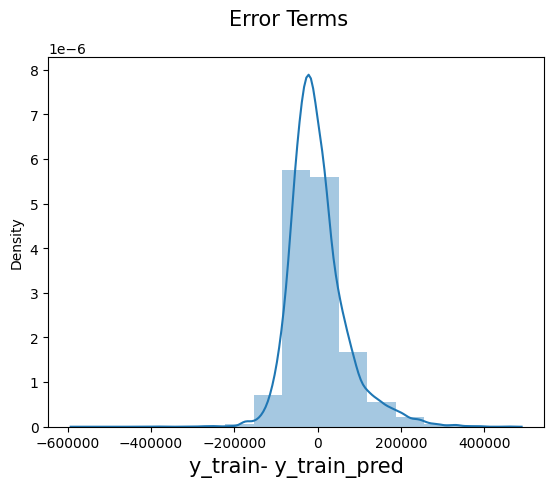

In [25]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train- y_train_pred', fontsize=15)
plt.show()


In [26]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [27]:
y_train.head(),y_test.head()

(18075    500001.0
 14380    288200.0
 2084      57100.0
 6581     500001.0
 7067     181100.0
 Name: median_house_value, dtype: float64,
 3636     172700.0
 15578    167200.0
 6910     379300.0
 2591      82100.0
 214      136700.0
 Name: median_house_value, dtype: float64)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
mean_square=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Average difference between your model's predicted values and the actual values: {mean_square}")


Average difference between your model's predicted values and the actual values: 71527.64408975803


In [30]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.623719265990168

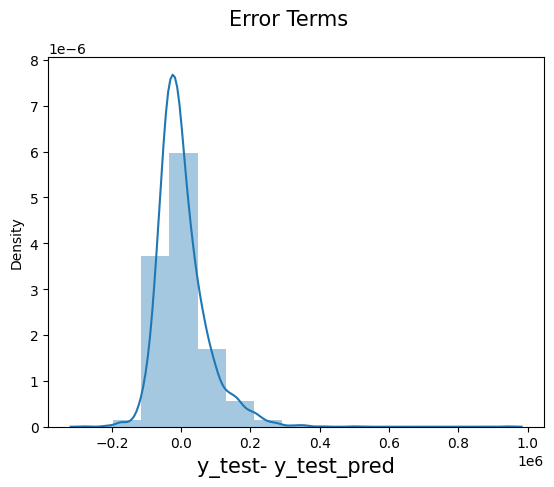

In [31]:
y_test_pred=lr.predict(X_test_sm)
res=(y_test-y_test_pred)

fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_test- y_test_pred', fontsize=15)
plt.show()

In [32]:
# Metrics:
# RMSE: Measures the average error in predictions. Lower values are better.
# R^2: Indicates how well the model explains test data variance.